*Joel Reyes Toledo*

Universidad de La Laguna. Grado en Física, curso 2022-23

Física Computacional.


# Práctica 4


*Modificar el ejercicio 3 de la práctica anterior (Problema físico representado por una EDO de segundo orden) para que las condiciones iniciales u otro parámetro de la EDO correspondiente sea una variable estocástica. Analizar el comportamiento de dicho sistema*

---


Se escogió como problema el resolver numéricamente la ecuación de Lane-Emden, que simula el perfil de potencial gravitatorio de un cuerpo polítropo con simetría esférica. Su forma de ecuación diferencial de orden 2 es la siguiente:

$\frac{d^2\phi}{dr^2} + \frac{2}{r}\frac{d\phi}{dr} = 4\pi G\left(\frac{-\phi}{(n+1)K}\right)^n$

Donde $\phi$ es la función del potencial gravitatorio, $K$ es la *constante politrópica* y $n$ es el *índice politrópico*. Son de interés los casos en los que $0\leq n \leq 5$, ya que son los que tienen sentido físico. En este estudio se realizará un análisis de los casos en los que $n$ toma valores enteros aunque también se puede editar el código para tomar valores racionales.

Para resolver esta EDO numéricamente es aconsejable escribirla de manera adimensional para que la precisión del método no se vea afectada. Para ello hacemos:

$z = Ar \ \ ; \ \ A^2 = \frac{4\pi G}{(n+1)^nK^n}\left(-\phi_c\right)^{n-1}$

$w = \frac{\phi}{\phi_c} = \left(\frac{\rho}{\rho_c}\right)^{1/n}$

Resultando la ecuación de Lane-Emden como:

$\frac{d^w}{dz^2} + \frac{2}{z} \frac{dw}{dz} + w^n = 0$

De aquí nos interesa hallar $w(z)$. Para hallarlo transformamoso la EDO de segundo orden en una de primer, para lo que definimos:

$y^0 = w \ \ , \ \ y^1 = \frac{dw}{dz}$

Finalmente, el sistema de EDOs a resolver es el siguiente:

$\frac{dy^0}{dz}=y^1 \atop \frac{dy^1}{dz} = -\frac{2}{z}y^1 -(y^0)^n$

Donde las condiciones iniciales vienen dadas por $w(0) = 1$, que refiere a que el potencial gravitatorio en $r=R$ (en el radio de la estrella) es nulo, y, para evitar el punto singular que tiene la ecuación en $z=0$ se obliga a que $w'(0) = 0$. Con esto ya se puede proceder a resolver la *ecuación de Lane-Emden*

In [ ]:
import numpy as np
import random as rdm
import pylab as plt

# Recuperamos el método de Runge-Kutta que se programó en el código anterior

def rk_orden2(zi, yi, F, h):
  y = np.zeros((len(zi), 2))
  y[0,:] = yi
  h2 = h/2

  for i in range(len(zi) - 1):
    k1 = np.array([F(zi[i], y[i, :])[0], F(zi[i], y[i, :])[1]])
    k2 = np.array([F(zi[i] + h2, y[i, :] + h2*k1)[0],
                   F(zi[i] + h2, y[i, :] + h2*k1)[1]])
    k3 = np.array([F(zi[i] + h2, y[i, :] + h2*k2)[0],
                   F(zi[i] + h2, y[i, :] + h2*k2)[1]])
    k4 = np.array([F(zi[i] + h2, y[i, :] + h2*k3)[0],
                   F(zi[i] + h2, y[i, :] + h2*k3)[1]])

    y[i+1,:] = y[i,:] + (h/6)*(k1 + 2*k2 + 2*k3 +k4)
  return y

En este problema, la variable de interés para recrear un proceso estocástico es $n$, el índice politrópico del Sol. La razón de escoger el índice politrópico como variable estocástica es debido a que este parámetro representa la relación entre la presión de un gas del gas que compone el sistema en relación a la densidad y caracterización del mismo, variando en función del elemento del que se componga, la distancia al centro de la estrella, su temperatura, etc.

Particularizando para el caso del Sol, sabemos que el índice politrópico se encuentra cercano a $1.5$, por lo que definiremos $n$ como nuestra variable estocástica de manera que siga una distribución gaussiana, centrada en $ \mu = 1.5$, y haremos que la precisión de los aparatos de medida en conjunto con la toma de datos sean tal que la desviación estándar sea $\sigma = 0.15$, es decir se mida de manera precisa.

El motivo de escoger una distribución gaussiana es debido a que, al determinar una estrella en concreto, se espera que todos los datos recogidos esten próximos al teórico del índice politrópico y no se desvíen en exceso de este (se refleja la desviación típica como la acumulación de los fallos de montaje o ruido en la toma de medidas). Es decir, que la probabilidad de que los valores más alejados al teórico tengan menos probabilidad de aparecer, y esto se puede conseguir con una distribución gaussiana

Text(0.5, 1.0, 'Ecuación de Lane Emden, con n como variable estocástica')

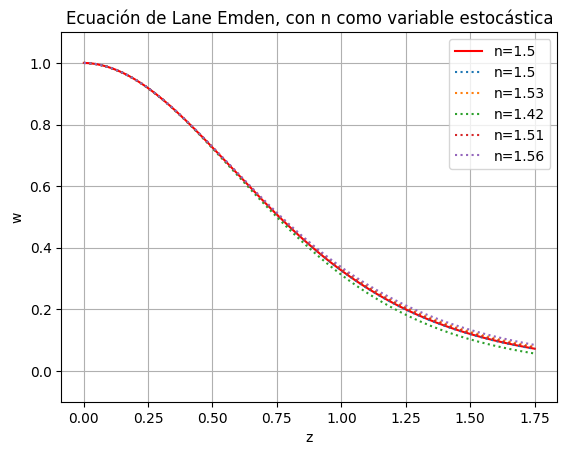

In [ ]:
# Definimos la variable estocástica:
mean_n = 1.5
desv_n = 0.15

# Número de medidas que se han hecho:
m = 5

# Implementamos la función y las condiciones iniciales
z = np.linspace(0.001, 1.75, 500)
w_0 = np.array([1, 0])
def funcion(zi, yi):
  return np.array([yi[1], (-2/zi)*(yi[1]) - (yi[0])**n])

# Ploteamos la solución exacta para n=1.5
n = mean_n
plt.plot(z, rk_orden2(z, w_0, funcion, 0.02)[:,0], "r-", label = f"n=1.5")

for n in range(m):
  n = rdm.gauss(mean_n, desv_n)
  plt.plot(z, rk_orden2(z, w_0, funcion, 0.02)[:,0], linestyle = "dotted",
           label = f"n={round(n, 2)}")

plt.ylim(-0.1, 1.1)
plt.legend(loc = "best")
plt.grid()
plt.xlabel("z")
plt.ylabel("w")
plt.title("Ecuación de Lane Emden, con n como variable estocástica")

Se puede apreciar en la gráfica que el índice politrópico afecta haciendo que el potencial gravitatorio en función de la distancia sea mayor o menor, si este es mayor o menor respectivamente. Es decir, que si se obtiene en una medida que el índice politrópico está por encima de la media, se habrá obtenido entonces que, a la misma distancia respecto del centro del Sol, el potencial gravitatorio al que está sometido el gas es superior. De manera contraria, si el índice politrópico medido es menor que el medio, el potencial gravitatorio para una misma distancia será menor.

Si bien la diferencia no es muy grande en cuanto a la forma de la curva, deja constancia de la relevancia de la precisión de las medidas de cara a que este, por ejemplo, este parámetro es indispensable en astronomía para la modelación de estructura estelares y la predicción de su evolución.

Se concluye entonces que la variable estocástica nos ha permitido simular una toma de medidas real para un aparato de medida con una precisión dada.